In [57]:
# import os
# os.chdir('../')
# %pwd

Load Extracted Features

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the extracted features
features_path = 'data/features/extracted_features.csv'
features = pd.read_csv(features_path)

# Display the first few rows
print(features.head())

   BVP_mean   BVP_std  ACC_X_mean  ACC_Y_mean  ACC_Z_mean  TEMP_mean  \
0  0.013829  2.291471   27.861877  -25.862279   19.613106  35.460832   
1  0.000731  0.994065   33.813407   -7.297195   24.827901  35.516166   
2  0.001173  0.465470   43.838196   -1.755778   35.592263  35.519333   
3 -0.000023  0.294084   44.846485  -11.244263   42.561256  35.546331   
4  0.000576  0.897162   44.016370   -9.123131   40.483478  35.669996   

   EDA_mean   EDA_std  BVP_psd_mean  BVP_psd_std  ...  HRV_pNN20  HRV_MinNN  \
0  1.217864  0.078524      0.010645     0.070833  ...  90.476190    546.875   
1  1.195514  0.085250      0.008269     0.059856  ...  78.125000    437.500   
2  1.115099  0.030581      0.005122     0.044267  ...  74.324324    500.000   
3  1.064092  0.062517      0.003477     0.042426  ...  77.777778    609.375   
4  1.020672  0.071941      0.014656     0.089303  ...  82.857143    531.250   

   HRV_MaxNN    HRV_HTI  HRV_TINN  EDA_SCL_mean  EDA_SCR_mean  EDA_SCR_peaks  \
0   9515.625

Summary Statistics

In [59]:
# Summary statistics
print(features.describe())

          BVP_mean      BVP_std   ACC_X_mean   ACC_Y_mean   ACC_Z_mean  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000   
mean     -0.000020     0.701400    11.704590    -2.248717    17.727828   
std       0.002620     0.504988    42.741542    24.457693    25.960247   
min      -0.021413     0.026114   -65.137132   -59.589349   -61.508934   
25%      -0.000780     0.336042   -37.409882   -17.296046     1.752119   
50%       0.000054     0.579553    29.451620    -1.981168    18.410313   
75%       0.000816     0.940268    47.783448    10.374933    37.376213   
max       0.017610     3.932010    63.027031    63.929328    62.982516   

         TEMP_mean     EDA_mean      EDA_std  BVP_psd_mean  BVP_psd_std  ...  \
count  2888.000000  2888.000000  2888.000000   2888.000000  2888.000000  ...   
mean     32.597937     1.804807     0.056307      0.008801     0.063520  ...   
std       1.496330     2.338260     0.137724      0.003574     0.015346  ...   
min      29.0

checking null values

In [60]:
features.isnull().sum()

BVP_mean                     0
BVP_std                      0
ACC_X_mean                   0
ACC_Y_mean                   0
ACC_Z_mean                   0
TEMP_mean                    0
EDA_mean                     0
EDA_std                      0
BVP_psd_mean                 0
BVP_psd_std                  0
ACC_magnitude_mean           0
ACC_magnitude_std            0
HRV_MeanNN                   0
HRV_SDNN                     0
HRV_SDANN1                2888
HRV_SDNNI1                2888
HRV_SDANN2                2888
HRV_SDNNI2                2888
HRV_SDANN5                2888
HRV_SDNNI5                2888
HRV_RMSSD                    0
HRV_SDSD                     0
HRV_CVNN                     0
HRV_CVSD                     0
HRV_MedianNN                 0
HRV_MadNN                    0
HRV_MCVNN                    0
HRV_IQRNN                    0
HRV_SDRMSSD                  0
HRV_Prc20NN                  0
HRV_Prc80NN                  0
HRV_pNN50                    0
HRV_pNN2

In [61]:
# Drop columns that have all null values
features_cleaned = features.dropna(axis=1, how='all')

# Display the dropped columns
dropped_columns = set(features.columns) - set(features_cleaned.columns)
print("Dropped columns:", dropped_columns)

# Display the remaining features
print(features_cleaned.columns)


features = features_cleaned

Dropped columns: {'HRV_SDANN5', 'HRV_SDANN2', 'HRV_SDANN1', 'HRV_SDNNI2', 'HRV_SDNNI1', 'HRV_SDNNI5'}
Index(['BVP_mean', 'BVP_std', 'ACC_X_mean', 'ACC_Y_mean', 'ACC_Z_mean',
       'TEMP_mean', 'EDA_mean', 'EDA_std', 'BVP_psd_mean', 'BVP_psd_std',
       'ACC_magnitude_mean', 'ACC_magnitude_std', 'HRV_MeanNN', 'HRV_SDNN',
       'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN',
       'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN', 'HRV_SDRMSSD', 'HRV_Prc20NN',
       'HRV_Prc80NN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_MinNN', 'HRV_MaxNN',
       'HRV_HTI', 'HRV_TINN', 'EDA_SCL_mean', 'EDA_SCR_mean', 'EDA_SCR_peaks',
       'EDA_SCR_amplitude_mean', 'stress_label'],
      dtype='object')


Distribution Plots

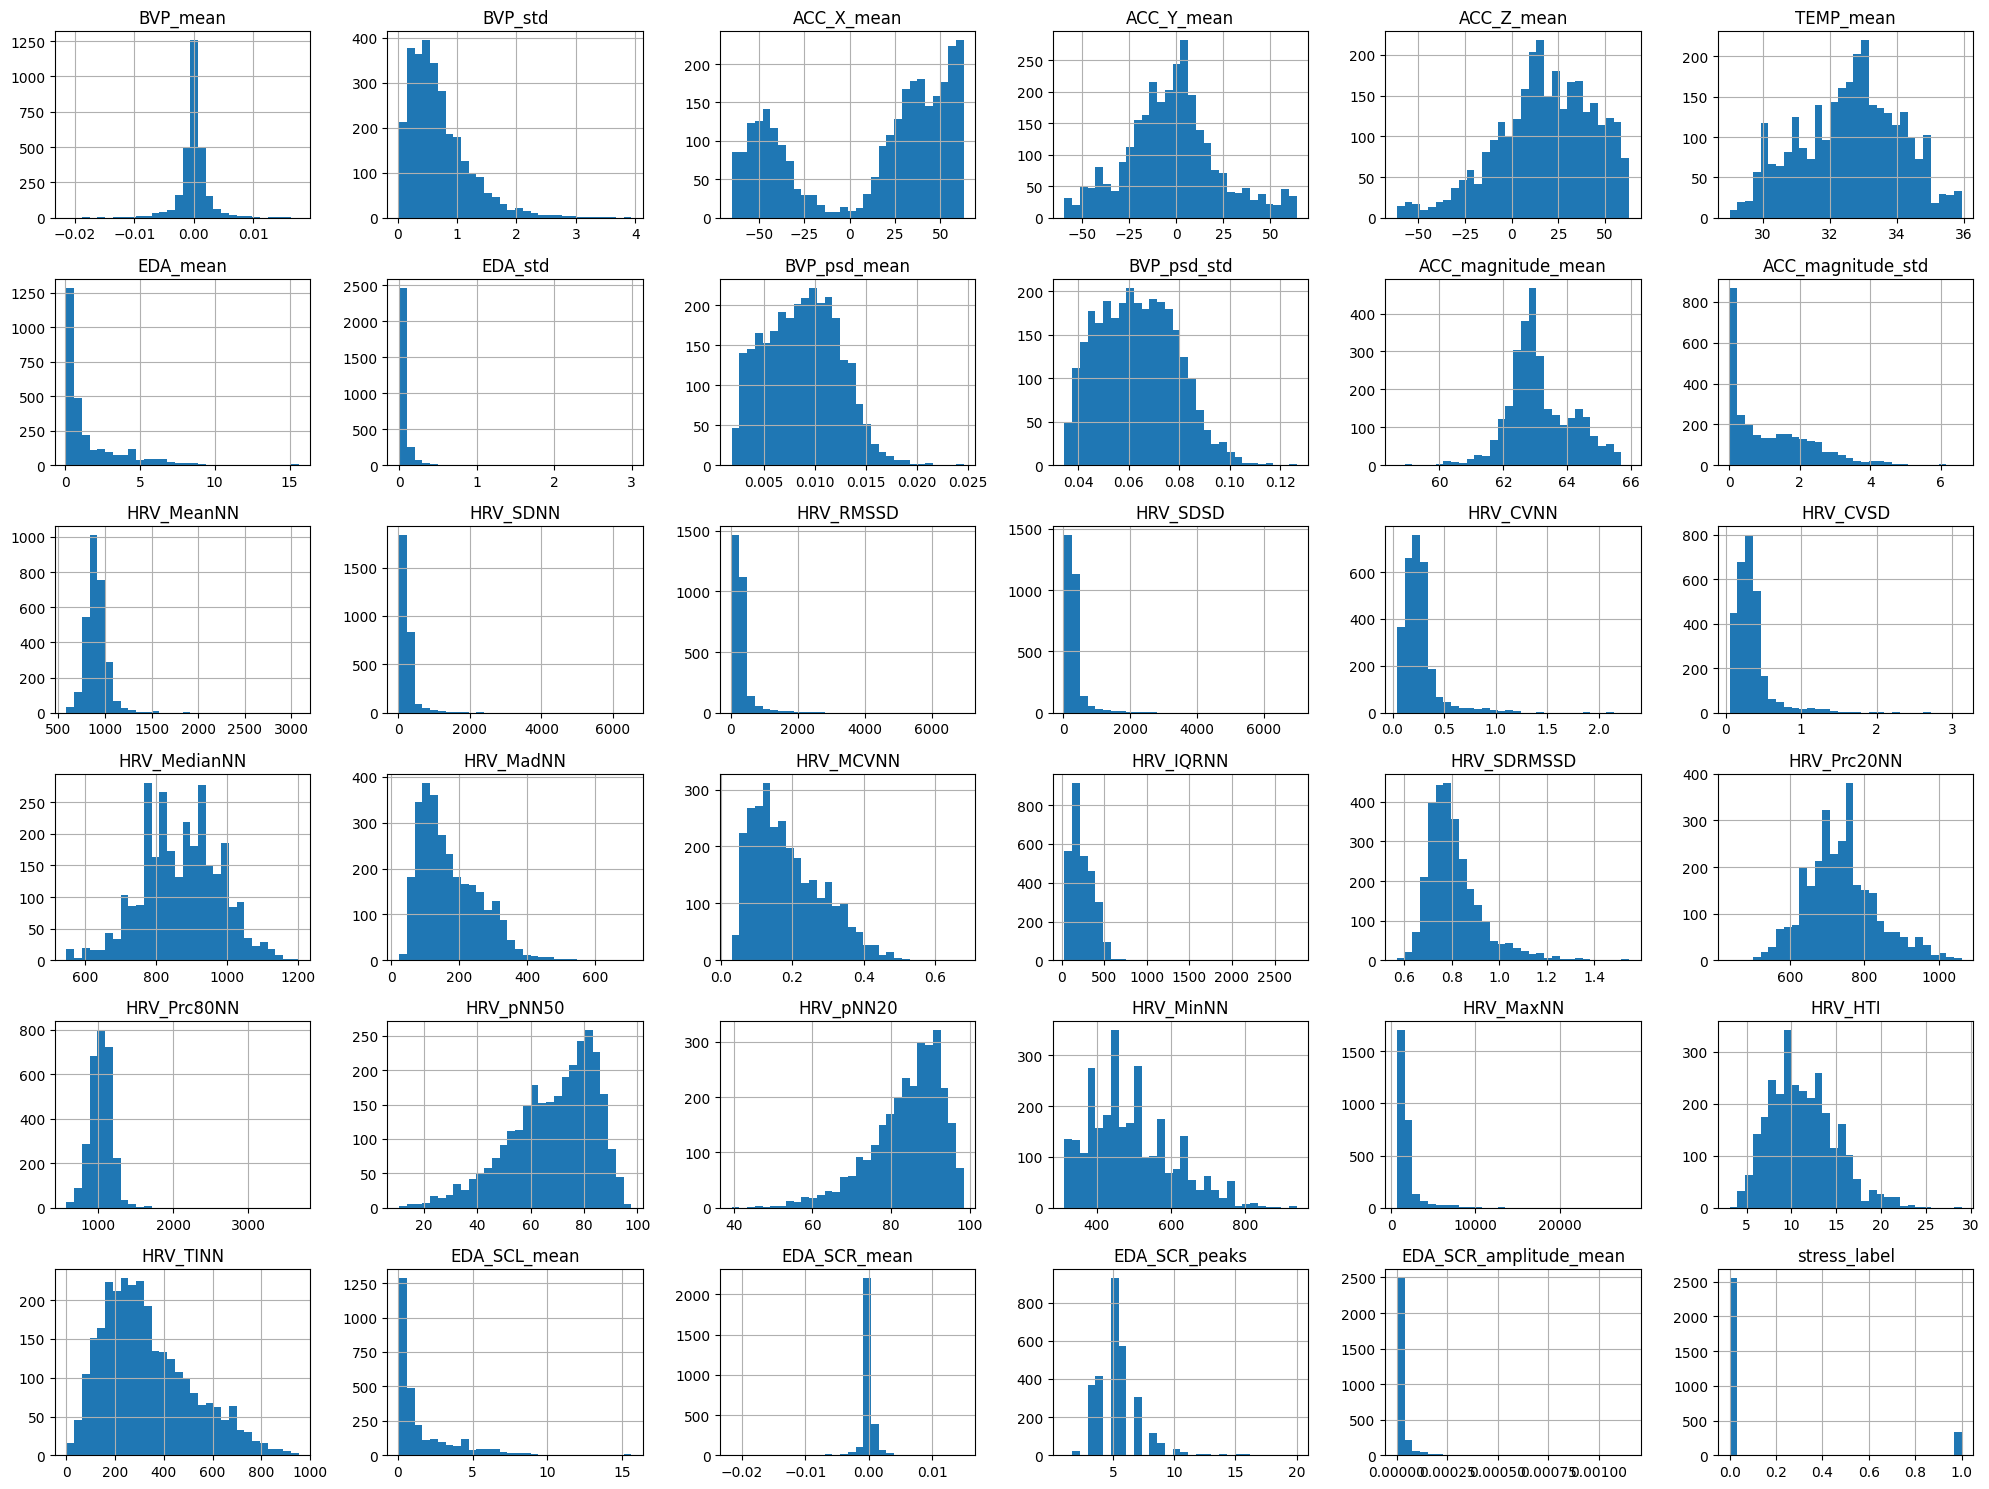

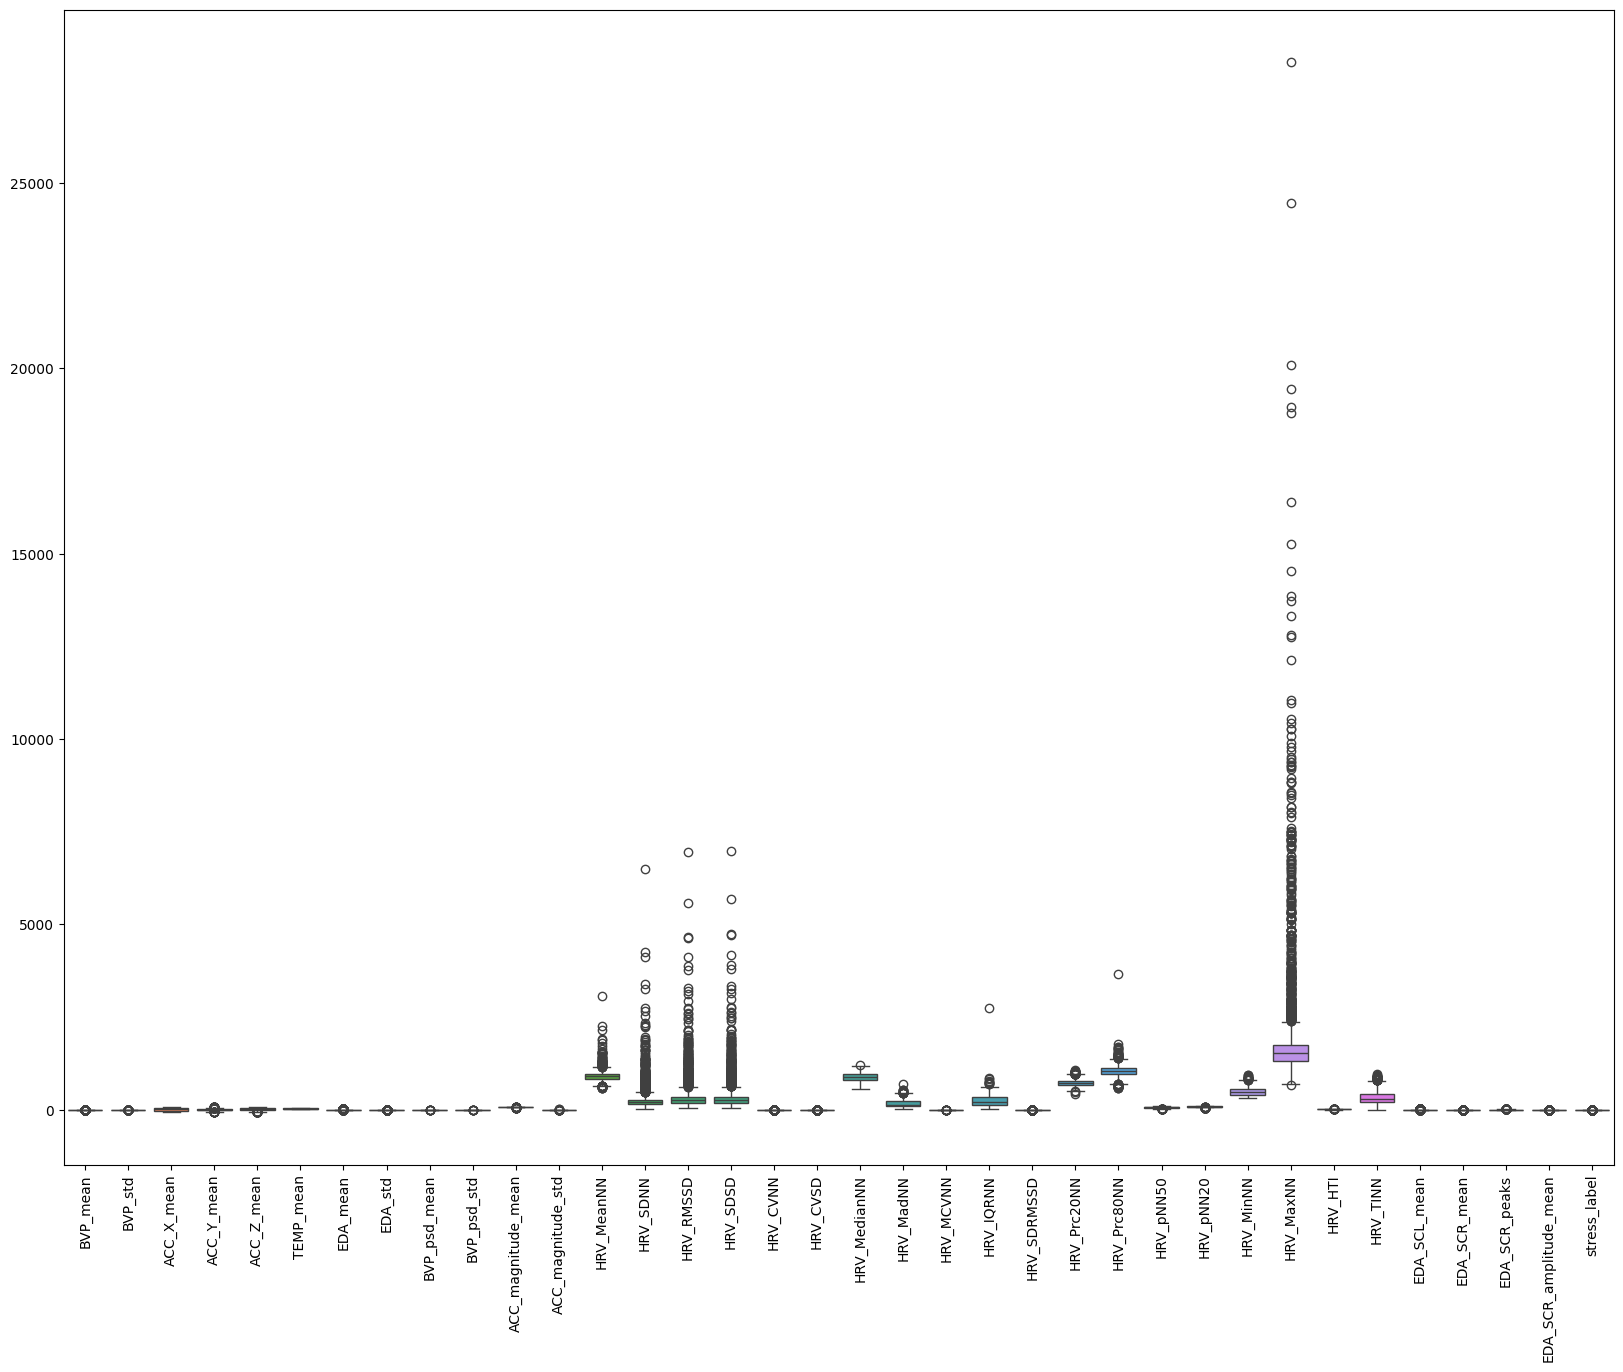

In [62]:
# Histograms for all features
features.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

# Box plots for all features
plt.figure(figsize=(20, 15))
sns.boxplot(data=features)
plt.xticks(rotation=90)
plt.show()

class Distribution of target Stress label

stress_label
0    2556
1     332
Name: count, dtype: int64


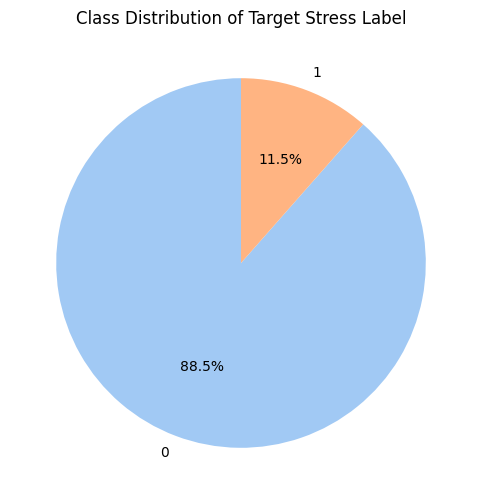

In [63]:

# Display count of each class
class_counts = features['stress_label'].value_counts()
print(class_counts)

# Display as a pie chart
plt.figure(figsize=(8, 6))
class_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Class Distribution of Target Stress Label')
plt.ylabel('')
plt.show()

Correlation Matrix


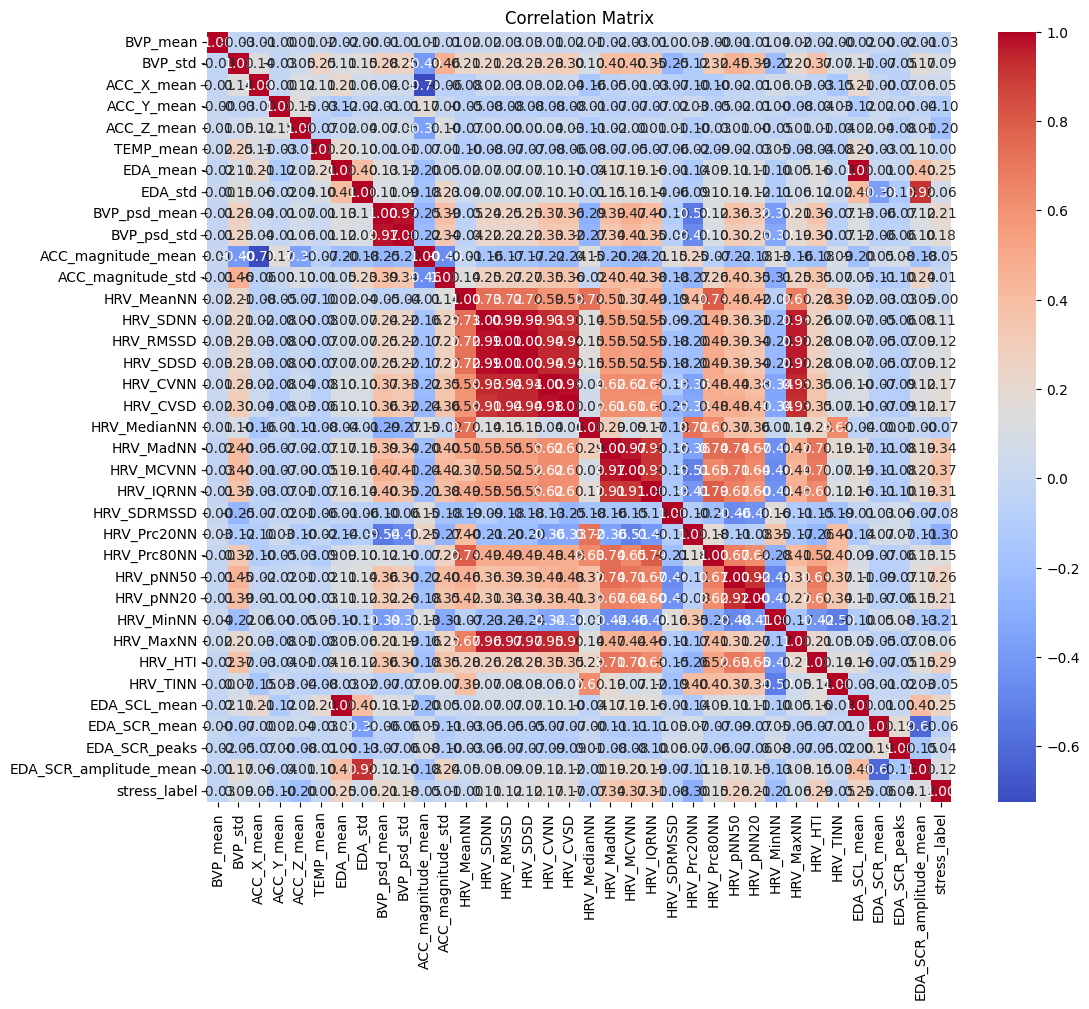

In [64]:
# Correlation matrix
correlation_matrix = features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Feature Relationships
Explore relationships between features and the stress labels using pair plots and violin plots.

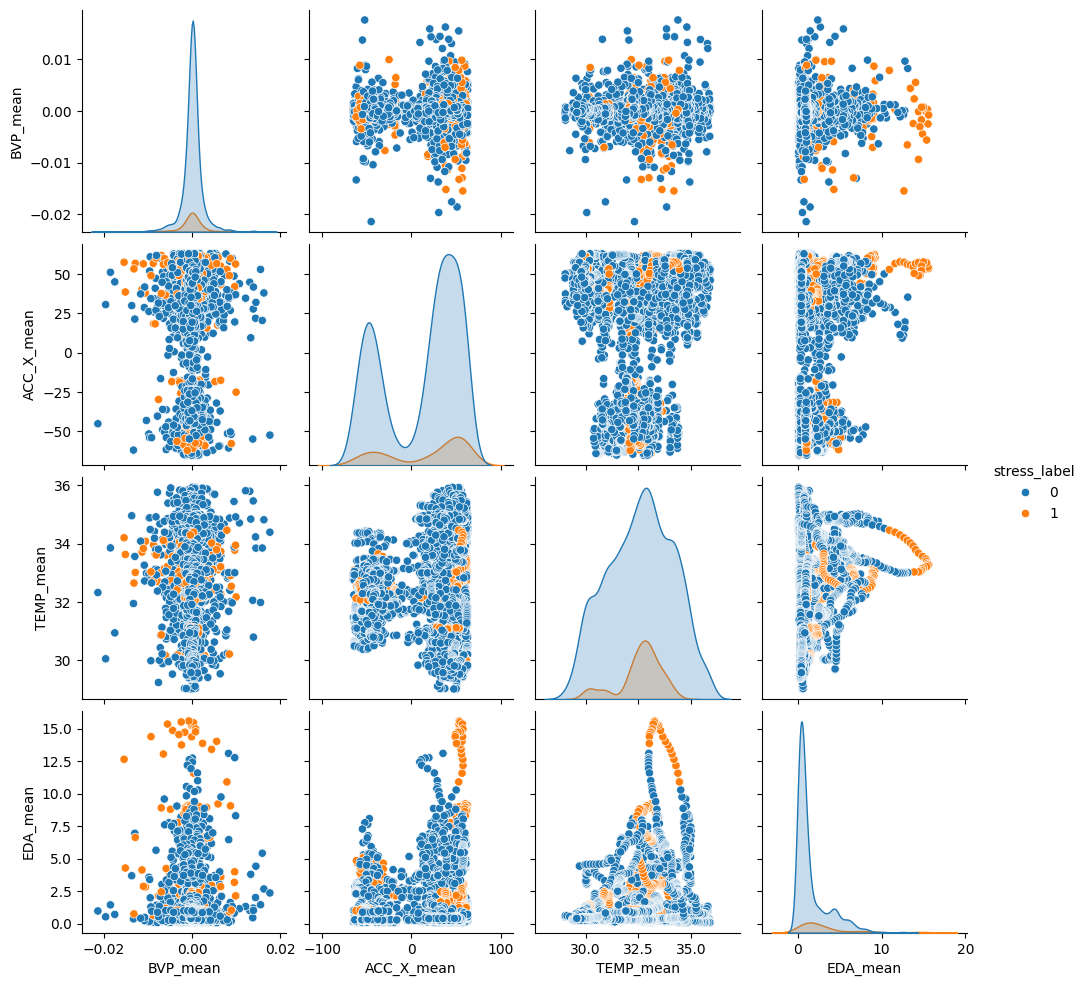

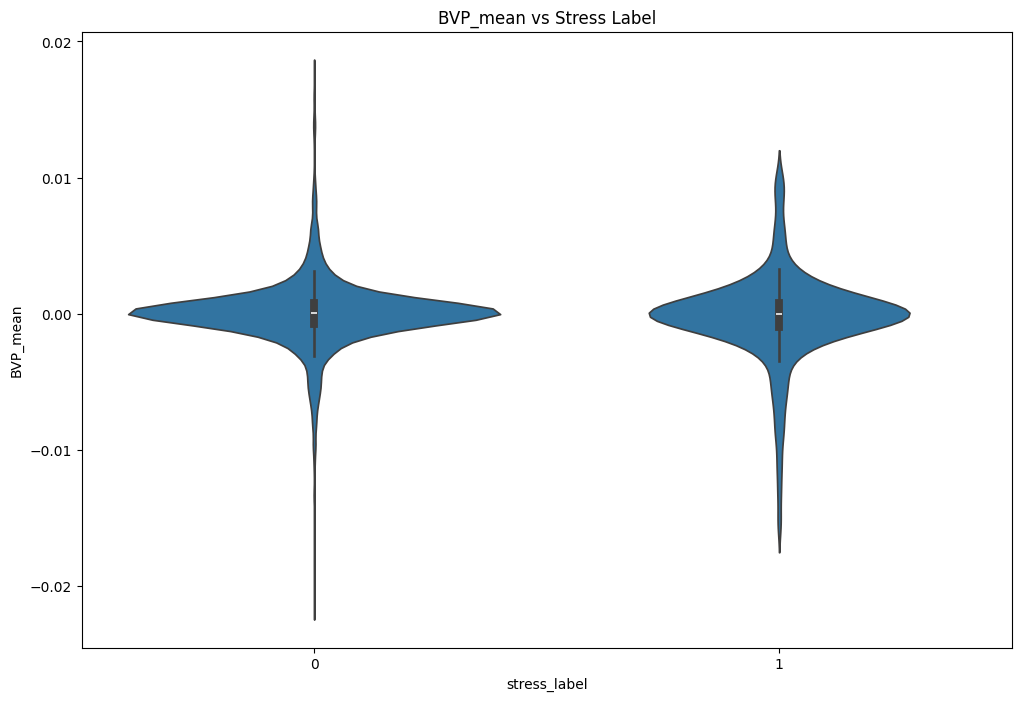

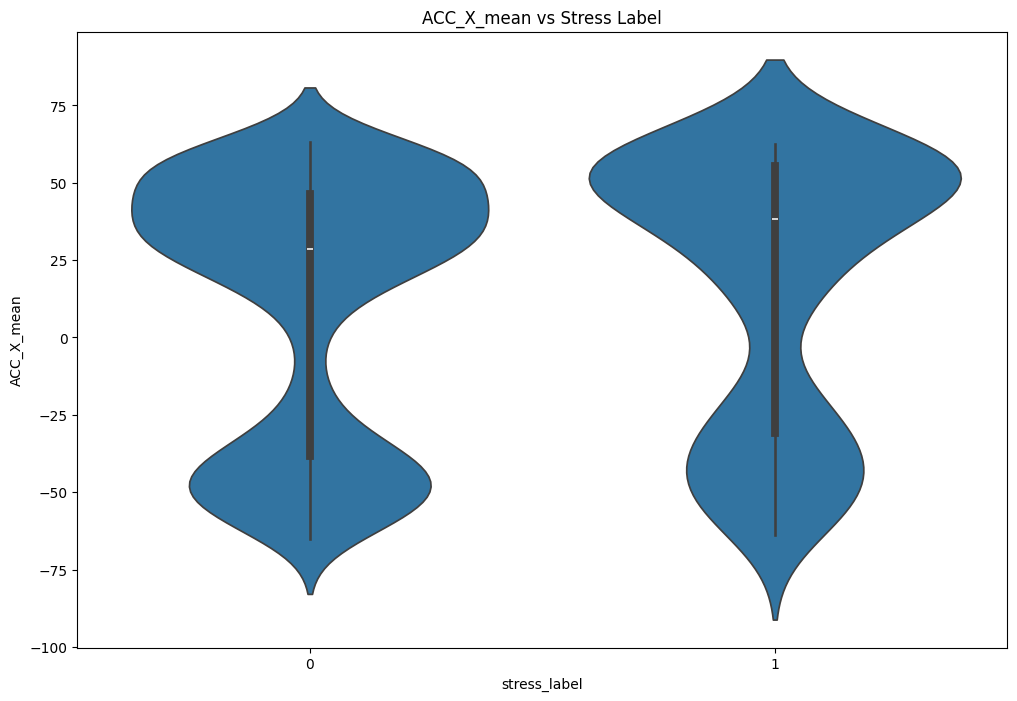

In [65]:
# Pair plot for selected features and stress label
selected_features = ['BVP_mean', 'ACC_X_mean', 'TEMP_mean', 'EDA_mean', 'stress_label']
sns.pairplot(features[selected_features], hue='stress_label')
plt.show()

# Violin plots for selected features and stress label
plt.figure(figsize=(12, 8))
sns.violinplot(x='stress_label', y='BVP_mean', data=features)
plt.title('BVP_mean vs Stress Label')
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x='stress_label', y='ACC_X_mean', data=features)
plt.title('ACC_X_mean vs Stress Label')
plt.show()


HRV Features and Stress

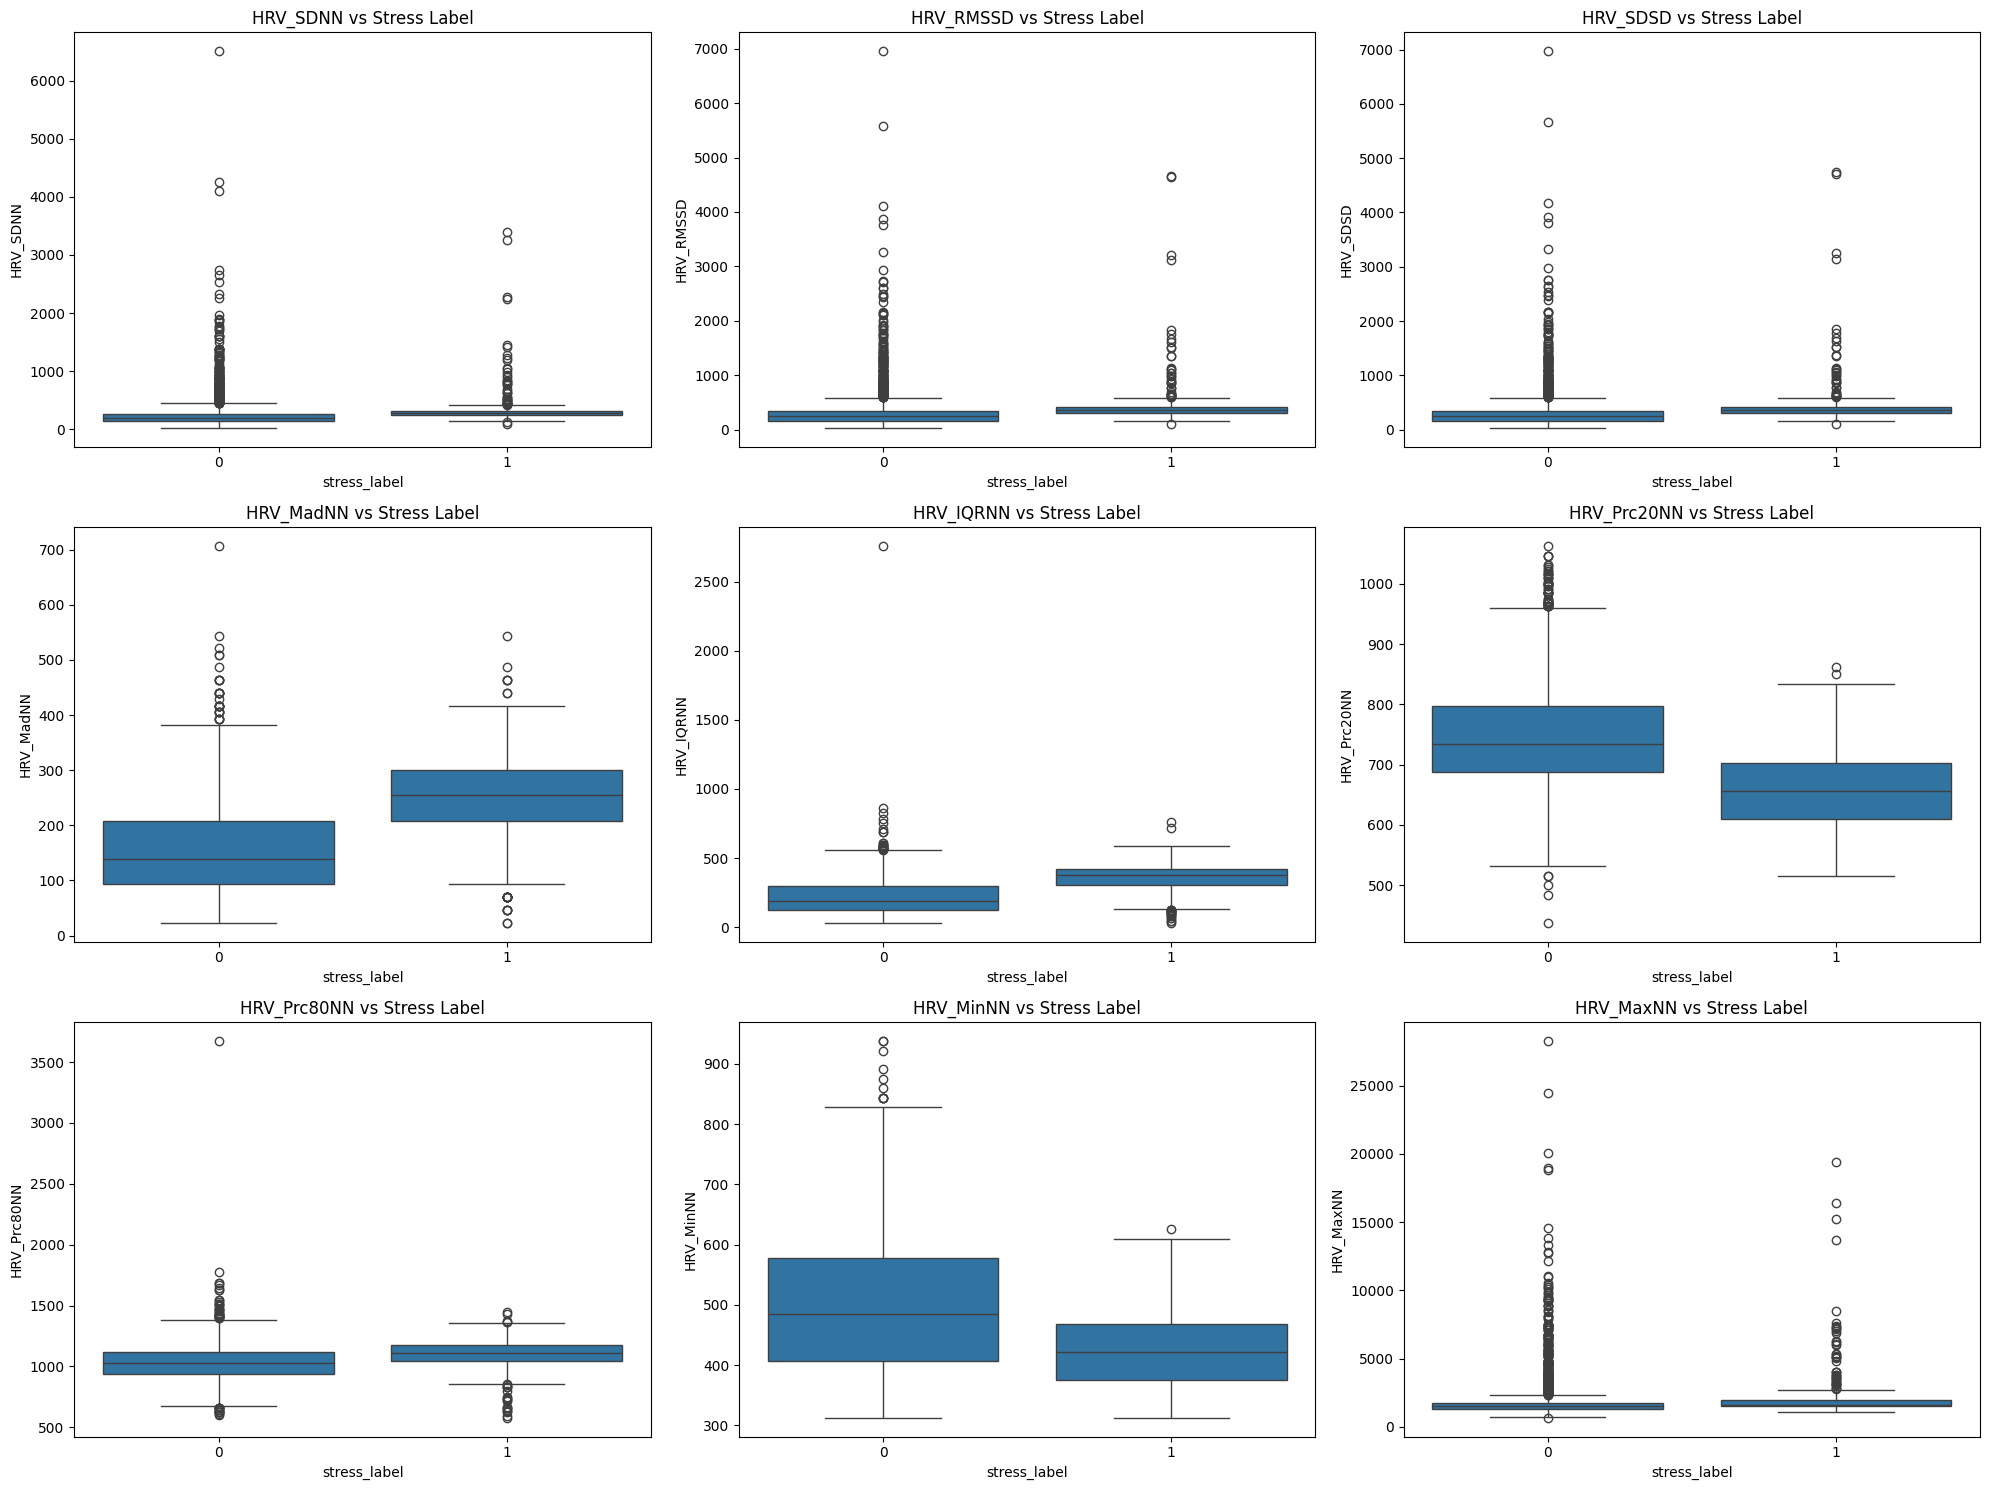

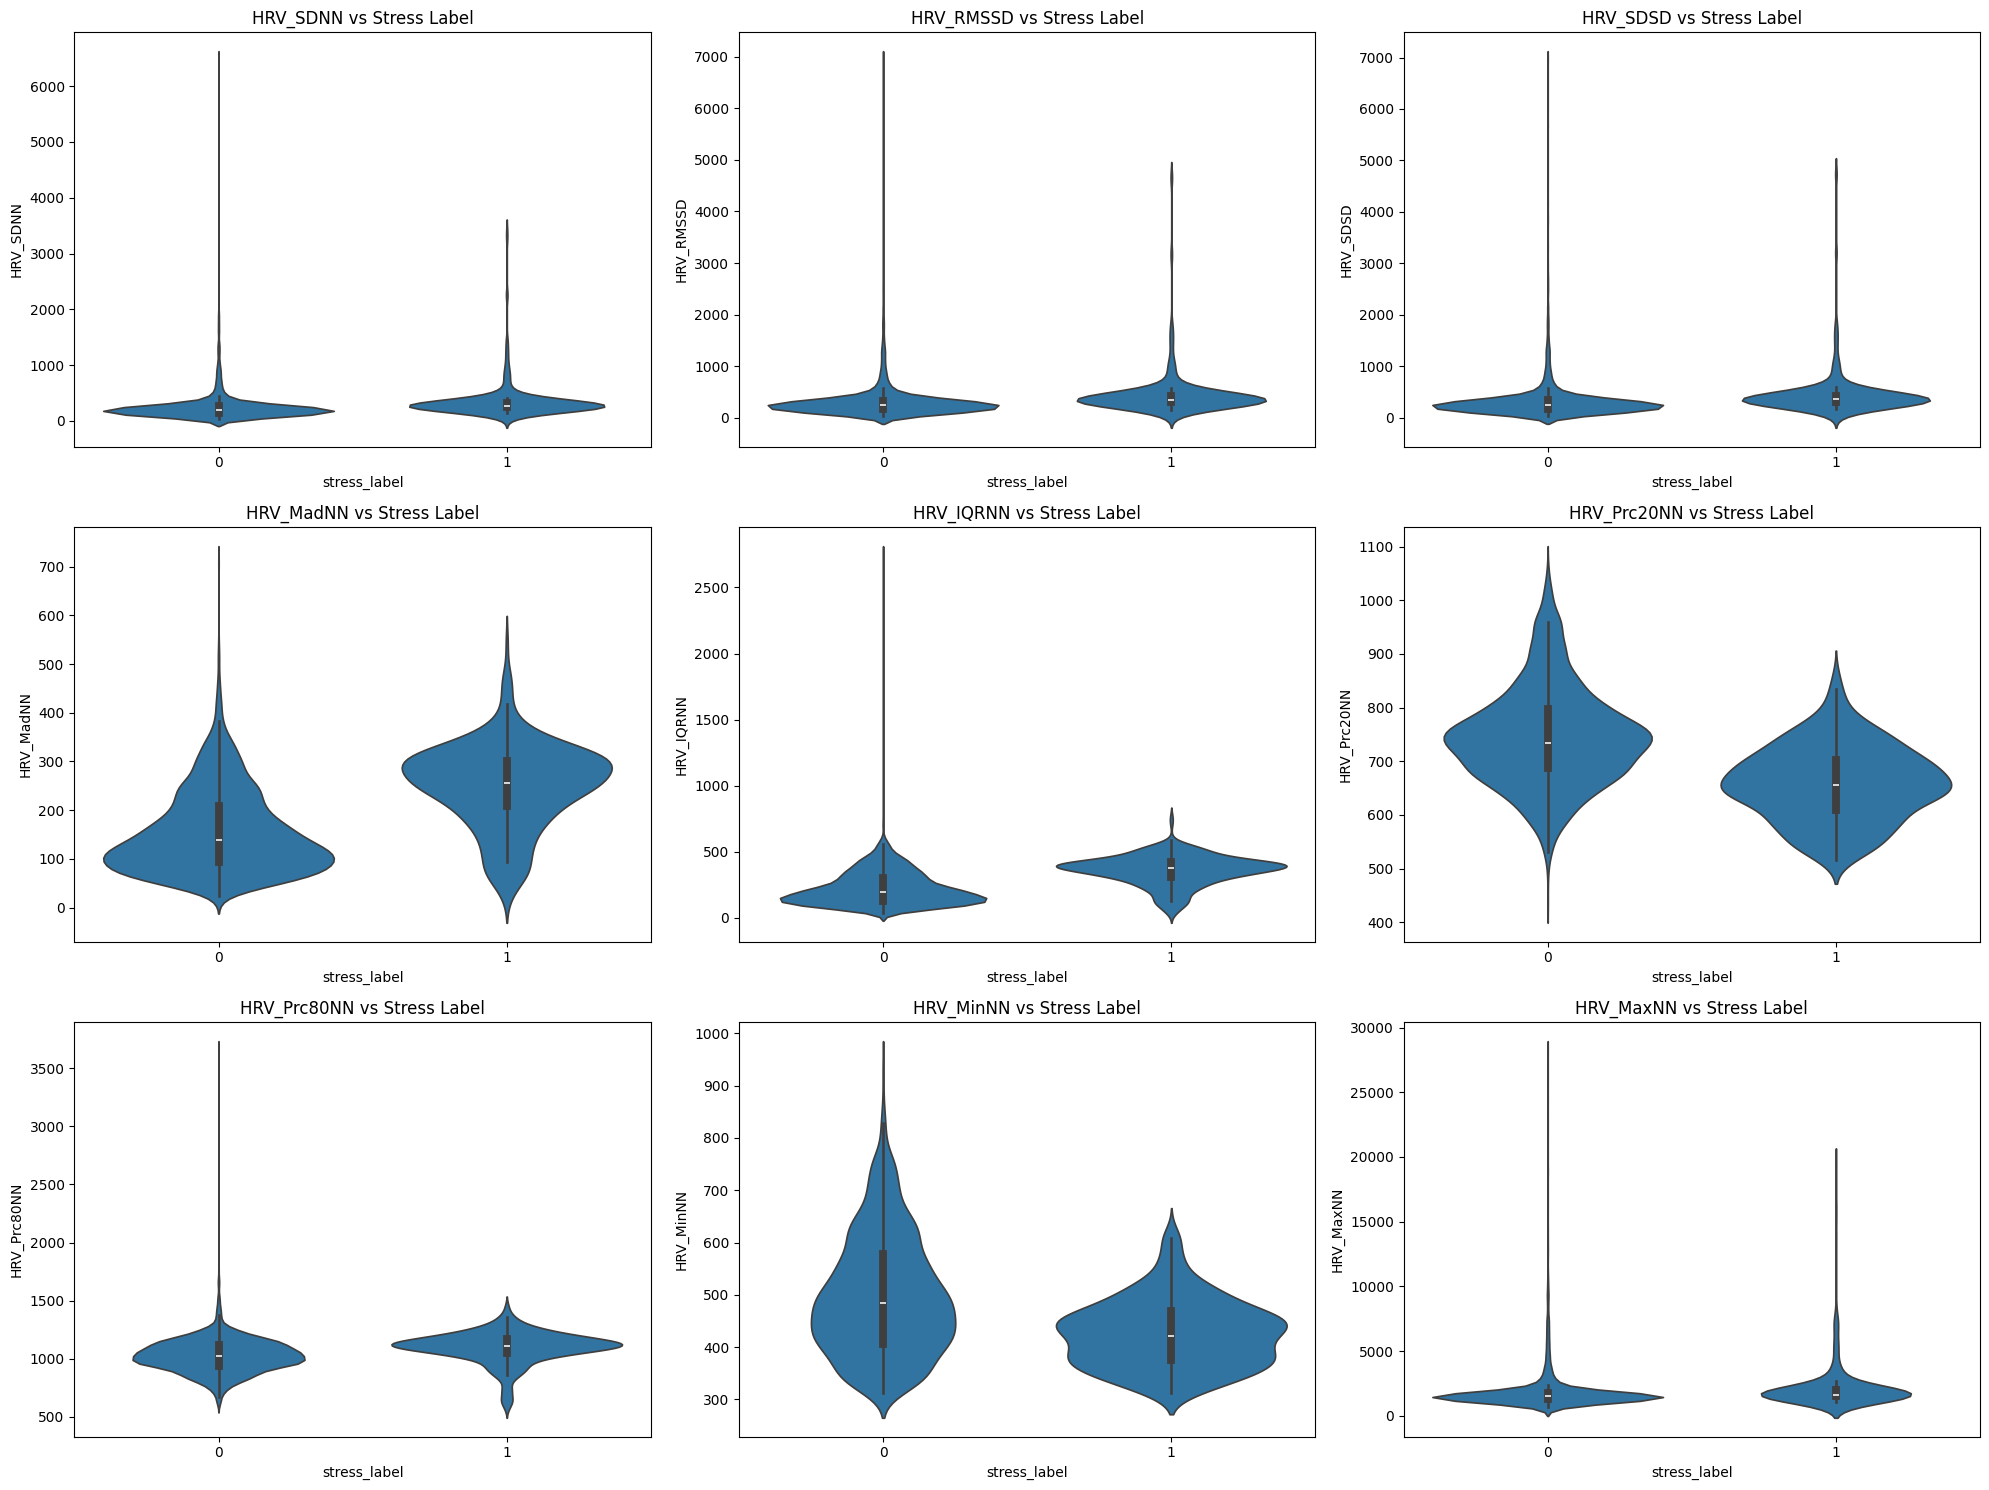

In [66]:
# List of HRV features to visualize
hrv_features = ['HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_MadNN', 'HRV_IQRNN', 'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_MinNN', 'HRV_MaxNN']

# Box plots for HRV features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(hrv_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='stress_label', y=feature, data=features)
    plt.title(f'{feature} vs Stress Label')
plt.tight_layout()
plt.show()

# Violin plots for HRV features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(hrv_features, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x='stress_label', y=feature, data=features)
    plt.title(f'{feature} vs Stress Label')
plt.tight_layout()
plt.show()

## Feature selection 
It is a crucial step in the machine learning pipeline. Based on the EDA results, you can use various techniques to select the most relevant features. Here are some common methods for feature selection:

Correlation Analysis: Remove highly correlated features.
Feature Importance: Use models like Random Forest to determine feature importance.
Statistical Tests: Use statistical tests to select features.

1. Remove Highly Correlated Features

In [67]:
# Calculate the correlation matrix
correlation_matrix = features.corr()

# Set a threshold for removing highly correlated features
threshold = 0.9

# Find features with correlation greater than the threshold
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print(highly_correlated_features)
# Remove highly correlated features
features_reduced = features.drop(columns=highly_correlated_features)

# Display the remaining features
print(features_reduced.columns)

{'HRV_IQRNN', 'HRV_CVNN', 'HRV_SDSD', 'BVP_psd_std', 'HRV_MaxNN', 'EDA_SCL_mean', 'HRV_MCVNN', 'HRV_CVSD', 'HRV_RMSSD', 'HRV_pNN20', 'EDA_SCR_amplitude_mean'}
Index(['BVP_mean', 'BVP_std', 'ACC_X_mean', 'ACC_Y_mean', 'ACC_Z_mean',
       'TEMP_mean', 'EDA_mean', 'EDA_std', 'BVP_psd_mean',
       'ACC_magnitude_mean', 'ACC_magnitude_std', 'HRV_MeanNN', 'HRV_SDNN',
       'HRV_MedianNN', 'HRV_MadNN', 'HRV_SDRMSSD', 'HRV_Prc20NN',
       'HRV_Prc80NN', 'HRV_pNN50', 'HRV_MinNN', 'HRV_HTI', 'HRV_TINN',
       'EDA_SCR_mean', 'EDA_SCR_peaks', 'stress_label'],
      dtype='object')


2. Feature Importance Using Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = features.drop(columns=['stress_label'])
y = features['stress_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

# Select top N features (e.g., top 10 features)
top_n = 10
selected_features = feature_importances['Feature'].head(top_n).tolist()

# Reduce the dataset to the selected features
features_selected = features[selected_features + ['stress_label']]

# Display the selected features
print(features_selected.columns)

                   Feature  Importance
4               ACC_Z_mean    0.084207
3               ACC_Y_mean    0.067999
2               ACC_X_mean    0.054510
31            EDA_SCL_mean    0.053742
11       ACC_magnitude_std    0.050242
6                 EDA_mean    0.042527
21               HRV_IQRNN    0.041822
5                TEMP_mean    0.035681
17                HRV_CVSD    0.035360
20               HRV_MCVNN    0.034224
16                HRV_CVNN    0.034051
1                  BVP_std    0.033978
34  EDA_SCR_amplitude_mean    0.032273
23             HRV_Prc20NN    0.032141
10      ACC_magnitude_mean    0.028247
19               HRV_MadNN    0.027609
25               HRV_pNN50    0.023377
13                HRV_SDNN    0.021978
14               HRV_RMSSD    0.020587
29                 HRV_HTI    0.020575
12              HRV_MeanNN    0.020433
7                  EDA_std    0.020072
18            HRV_MedianNN    0.020057
32            EDA_SCR_mean    0.019869
28               HRV_MaxN